In [2]:
! pip install sentence_transformers

You should consider upgrading via the 'C:\Users\ahber\PycharmProjects\dit\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np

import json
import re

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

from nltk.corpus import stopwords
from sentence_transformers import SentenceTransformer, util
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahber\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
! pip install transformers

You should consider upgrading via the 'C:\Users\ahber\PycharmProjects\dit\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [5]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

In [6]:
model = SentenceTransformer('stsb-roberta-large')

In [7]:
cleanFilePath = "issues_final.json"  # "/content/drive/MyDrive/cs48k/issues_final.json"
with open(cleanFilePath, 'r') as clean_json_file:
    data = json.load(clean_json_file)
    issues_df = pd.DataFrame(data,
                             columns=['id', 'title', 'body', 'comments', 'originalId', 'originalTitle', 'originalBody'])

    stop_words_l = stopwords.words('english')

    issues_df['title_cleaned'] = issues_df.title.apply(lambda x: " ".join(
        re.sub(r'[^a-zA-Z0-9]', ' ', w).lower() for w in x.split() if
        re.sub(r'[^a-zA-Z]', ' ', w).lower() not in stop_words_l))
    issues_df['body_cleaned'] = issues_df.body.apply(lambda x: " ".join(
        re.sub(r'[^a-zA-Z0-9]', ' ', w).lower() for w in str(x).split() if
        re.sub(r'[^a-zA-Z]', ' ', w).lower() not in stop_words_l))
    issues_df['original_title_cleaned'] = issues_df.originalTitle.apply(lambda x: " ".join(
        re.sub(r'[^a-zA-Z0-9]', ' ', w).lower() for w in x.split() if
        re.sub(r'[^a-zA-Z]', ' ', w).lower() not in stop_words_l))
    issues_df['original_body_cleaned'] = issues_df.originalBody.apply(lambda x: " ".join(
        re.sub(r'[^a-zA-Z0-9]', ' ', w).lower() for w in x.split() if
        re.sub(r'[^a-zA-Z]', ' ', w).lower() not in stop_words_l))

    print(issues_df.head())

       id                                              title  \
0  102139                        [A11y] Scaffold bottomSheet   
1  102138  Platform.executable return null  in Flutter De...   
2  102135  When using the physical keyboard on the ipad, ...   
3  102076  [cross_file] file.name always returns empty st...   
4  102068  [tool_crash] NoSuchMethodError: NoSuchMethodEr...   

                                                body  \
0  ## Steps to Reproduce\r\n1. Add the following ...   
1  Platform.executable  always return  null  in F...   
2  ## Steps to Reproduce\r\n\r\n1. Execute `flutt...   
3  `XFile.fromData` implementation of `io` platfo...   
4  ## Command\r\n```\r\nflutter run --flavor ship...   

                                            comments  originalId  \
0  [Hi @838, Thanks for filing the issue.  Looks ...       74246   
1  [Hi @LaiZhou, Thanks for filing the issue. I c...      102138   
2  [Hi @hatano0x06, Thanks for filing the issue. ...       99652   
3  [Du

In [49]:
title_list = list(issues_df['title_cleaned'])
# original_title_list = [(issues_df['originalId'][i],issues_df['original_title_cleaned'][i]) for i in range(len(issues_df.index))]
original_title_list = list(issues_df['original_title_cleaned'])
title_list = title_list[0:100]
original_title_list



['proposal add ios voiceover two finger scrub',
 'platform executable return null flutter desktop application linux ',
 'textfield text reappears calling  texteditingcontroller clear  japanese text input',
 ' cross file  using name specified constructor file backed dart io file',
 'nosuchmethoderror  getter  assetpathstoevict  called null ',
 ' tool crash   casterror    0 describelocale  package flutter tools src localizations localizations utils dart 221 49  ',
 'support multiple windows desktop shells',
 ' local auth  getavailablebiometrics return  enrolled  biometrics  returns present hardware android',
 ' tool crash  stateerror  bad state  future already completed',
 ' tool crash  processexception  file directory command   applications google chrome app contents macos google chrome  os error code  2',
 'invalid argument s   cannot find executable e  software android flutter windows 1 22 2 stable flutter bin cache artifacts engine android arm64 release windows x64 gen snapshot  ',
 

In [147]:
title_list = list(issues_df['title_cleaned'])
# original_title_list = [(issues_df['originalId'][i],issues_df['original_title_cleaned'][i]) for i in range(len(issues_df.index))]
original_title_list = list(issues_df['original_title_cleaned'])
title_list = title_list[0:100]
original_title_list


['proposal add ios voiceover two finger scrub',
 'platform executable return null flutter desktop application linux ',
 'textfield text reappears calling  texteditingcontroller clear  japanese text input',
 ' cross file  using name specified constructor file backed dart io file',
 'nosuchmethoderror  getter  assetpathstoevict  called null ',
 ' tool crash   casterror    0 describelocale  package flutter tools src localizations localizations utils dart 221 49  ',
 'support multiple windows desktop shells',
 ' local auth  getavailablebiometrics return  enrolled  biometrics  returns present hardware android',
 ' tool crash  stateerror  bad state  future already completed',
 ' tool crash  processexception  file directory command   applications google chrome app contents macos google chrome  os error code  2',
 'invalid argument s   cannot find executable e  software android flutter windows 1 22 2 stable flutter bin cache artifacts engine android arm64 release windows x64 gen snapshot  ',
 

In [64]:
title_list = list(issues_df['original_title_cleaned'])
# original_title_list = [(issues_df['originalId'][i],issues_df['original_title_cleaned'][i]) for i in range(len(issues_df.index))]
original_title_list = list(issues_df['original_title_cleaned'])
title_list = title_list[0:100]
original_title_list


['proposal add ios voiceover two finger scrub',
 'platform executable return null flutter desktop application linux ',
 'textfield text reappears calling  texteditingcontroller clear  japanese text input',
 ' cross file  using name specified constructor file backed dart io file',
 'nosuchmethoderror  getter  assetpathstoevict  called null ',
 ' tool crash   casterror    0 describelocale  package flutter tools src localizations localizations utils dart 221 49  ',
 'support multiple windows desktop shells',
 ' local auth  getavailablebiometrics return  enrolled  biometrics  returns present hardware android',
 ' tool crash  stateerror  bad state  future already completed',
 ' tool crash  processexception  file directory command   applications google chrome app contents macos google chrome  os error code  2',
 'invalid argument s   cannot find executable e  software android flutter windows 1 22 2 stable flutter bin cache artifacts engine android arm64 release windows x64 gen snapshot  ',
 

In [148]:
# encode list of sentences to get their embeddings
embedding1 = model.encode(title_list, convert_to_tensor=True)
embedding2 = model.encode(original_title_list, convert_to_tensor=True)  # compute similarity scores of two embeddings
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)



In [155]:
issue = input("Enter issue")
inputEmbedding = model.encode([issue], convert_to_tensor=True)
originalEmbedding = model.encode(title_list, convert_to_tensor=True)  # compute similarity scores of two embeddings
input_cosine_scores = util.pytorch_cos_sim(inputEmbedding, originalEmbedding)

In [160]:
print("Input: ",issue,"\n")
for j in range(len(title_list)):
    cosine_similarity = input_cosine_scores[0][j].item()
    if cosine_similarity > 0.6:
        print("issue id:", issues_df.iloc[j]["id"], " Issue Title:", title_list[j] )
        print("Similarity Score:", input_cosine_scores[0][j].item())
        print("\n")

Input:  When using the physical keyboard on the ipad, erased characters 

issue id: 102135  Issue Title: using physical keyboard ipad  erased characters reappear
Similarity Score: 0.6863803863525391


issue id: 101273  Issue Title:  textfield ios  use texteditingcontroller add delete emoji emoji displayed abnormally
Similarity Score: 0.672225832939148


issue id: 100945  Issue Title:  windows  keyboard show without textfield tablet mode
Similarity Score: 0.621269702911377




In [134]:
original_similars_map = {}
for i in range(len(title_list)):
    # print("issue id:", issues_df.iloc[i]["id"], " Issue Title:", title_list[i])
    # print("Similar Issues:\n")
    original_similars_map[(issues_df.iloc[i]["originalId"], issues_df.iloc[i]["originalTitle"])] = []
    for j in range(len(original_title_list)):
        cosine_similarity = cosine_scores[i][j].item()
        if cosine_similarity > 0.62 and i != j:
            original_similars_map[(issues_df.iloc[i]["originalId"], issues_df.iloc[i]["originalTitle"])].append(
                (issues_df.iloc[j], cosine_similarity))
            # print("issue id:", issues_df.iloc[j]["id"], " Issue Title:", title_list[j] )
            # print("Similarity Score:", cosine_scores[i][j].item())
            # print("\n")



In [149]:
similars_map = {}
for i in range(len(title_list)):
    # print("issue id:", issues_df.iloc[i]["id"], " Issue Title:", title_list[i])
    # print("Similar Issues:\n")
    similars_map[(issues_df.iloc[i]["id"], issues_df.iloc[i]["title"])] = []
    for j in range(len(original_title_list)):
        cosine_similarity = cosine_scores[i][j].item()
        if cosine_similarity > 0.6:
            similars_map[(issues_df.iloc[i]["id"], issues_df.iloc[i]["title"])].append(
                (issues_df.iloc[j], cosine_similarity))
            # print("issue id:", issues_df.iloc[j]["id"], " Issue Title:", title_list[j] )
            # print("Similarity Score:", cosine_scores[i][j].item())
            # print("\n")



In [136]:
original_count = 0
for k, v in original_similars_map.items():
    if len(v) > 0:
        print("* issue id:", k[0], " Issue Title:", k[1])
        print("  Similar Issues:")
        i = 1
        v.sort(key=lambda a: a[1], reverse=True)
        entered = False
        for index in range(len(v)):
            if v[index][0]["originalId"] != k[0]:
                entered = True
                print("   ", i, "- Similarity Score:", v[index][1], " -> , original issue id:",
                      v[index][0]["originalId"], " Issue Title:",
                      v[index][0]["originalTitle"])
            i += 1
        if entered:
            original_count += 1
        print("\n")
original_count

* issue id: 99652  Issue Title: TextField text reappears after calling `TextEditingController.clear` with Japanese text input
  Similar Issues:


* issue id: 89738  Issue Title: NoSuchMethodError: The getter 'assetPathsToEvict' was called on null.
  Similar Issues:
    4 - Similarity Score: 0.7193589806556702  -> , original issue id: 99460  Issue Title: Null check operator used on a null value
    5 - Similarity Score: 0.6648340225219727  -> , original issue id: 95630  Issue Title: Error in service hardware_keyboard.dart throws Null check operator used on a null value. 
    6 - Similarity Score: 0.6396398544311523  -> , original issue id: 98174  Issue Title: [tool_crash] NoSuchMethodError: NoSuchMethodError: The getter 'assetPathsToEvict' was called on null.Receiver: nullTried calling: assetPathsToEvict
    7 - Similarity Score: 0.6354602575302124  -> , original issue id: 84650  Issue Title: Null check operator used on a null value within TextPainter.getPositionForOffset


* issue id: 

32

In [150]:
true_indices = []
for k, v in similars_map.items():
    if len(v) > 0:
        print("* issue id:", k[0], " Issue Title:", k[1])
        print("  Similar Issues:")
        i = 1
        v.sort(key=lambda a: a[1], reverse=True)
        for index in range(len(v)):
            if v[index][0]["id"] == k[0]:
                true_indices.append(index + 1)
            print("   ", i, "- Similarity Score:", v[index][1], " -> issue id:", v[index][0]["id"],
                  " , original issue id:", v[index][0]["originalId"], " Issue Title:",
                  v[index][0]["originalTitle"])
            i += 1
        print("\n")

* issue id: 102138  Issue Title: Platform.executable return null  in Flutter Desktop application(Linux)
  Similar Issues:
    1 - Similarity Score: 0.9999997615814209  -> issue id: 102138  , original issue id: 102138  Issue Title: Platform.executable return null  in Flutter Desktop application(Linux)
    2 - Similarity Score: 0.611551821231842  -> issue id: 101975  , original issue id: 68475  Issue Title: Invalid argument(s): Cannot find executable for E:\software\Android\flutter_windows_1.22.2-stable\flutter\bin\cache\artifacts\engine\android-arm64-release\windows-x64\gen_snapshot."


* issue id: 102068  Issue Title: [tool_crash] NoSuchMethodError: NoSuchMethodError: The getter 'assetPathsToEvict' was called on null.Receiver: nullTried calling: assetPathsToEvict
  Similar Issues:
    1 - Similarity Score: 0.9999991655349731  -> issue id: 98174  , original issue id: 98174  Issue Title: [tool_crash] NoSuchMethodError: NoSuchMethodError: The getter 'assetPathsToEvict' was called on null.

In [151]:
sum(true_indices) / len(true_indices)

1.565217391304348

In [152]:
TP = len(true_indices)
precision = TP / 100
TN = 100 - original_count
recall = TP / (TP + TN)
accuracy = (TP + TN) / 200
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.46
Recall: 0.40350877192982454
Accuracy: 0.57


dict_values([32, 8, 5, 0, 0, 0, 0, 0, 1])


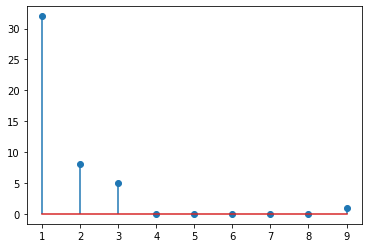

In [153]:
import matplotlib.pyplot as plt
import numpy as np

occurences = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}
for i in true_indices:
    occurences[i] += 1
print(occurences.values())

x = [1,2,3,4,5,6,7,8,9]
y = list(occurences.values())

plt.stem(x, y)
plt.show()